In [1]:
import torch
import torch.nn as nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import arkad
from arkad import BaseModel
from torch.utils.data import Dataset, DataLoader

import sys
import os

current_dir = os.getcwd()

sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

from src.datasets import *
from src.models import *

c:\Users\gabri\anaconda3\envs\nlp_dl\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_train, dataset_test, label_encoder, classes = get_my_dataset()
print("Classes: ", label_encoder.keys())

None in 39
None in 81
None in 29


c:\Users\gabri\Documents\vector-search\src\datasets.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_data['class'] = output_data['class'].map(label_encoder)


Classes:  dict_keys(['poder-justica', 'poder-economia', 'poder-governo', 'poder-internacional', 'poder-eleicoes', 'poder-congresso', 'poder-sportsmkt'])


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from src.train_test import *

# Defina os hiperparâmetros
hidden_dim = [768, 512, 256]
encoding_size = 128
learning_rate = 3e-4
num_epochs = 15
batch_size = 64

# Instancie o modelo
model = VAE(
    hidden_dim=hidden_dim,
    encoding_size=encoding_size,
    output_dim_classifier=len(classes),
    dropout=0.5,
    batch_norm_1d=True
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
reconstruction_loss_fn = nn.MSELoss()
classification_loss_fn = nn.CrossEntropyLoss()

In [4]:
history_train, history_val, history_metrics_train, history_metrics_val = train(model,
                                                                               dataset_train,
                                                                               optimizer,
                                                                               num_epochs,
                                                                               batch_size,
                                                                               criterions=[reconstruction_loss_fn, classification_loss_fn],
                                                                               validation_split=0.1)

Dataset dividido em 3564 amostras para treinamento e 396 para validação.


0it [00:00, ?it/s]c:\Users\gabri\anaconda3\envs\nlp_dl\lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
56it [00:46,  1.19it/s]
7it [00:04,  1.49it/s]


Epoch [1/15]
Loss: 3.9832, KL Loss: 0.0554, Recon Loss: 0.0683, Classification Loss: 3.8595
Validation Loss: 3.8691, Validation KL Loss: 0.0038, Validation Recon Loss: 0.0707, Validation Classification Loss: 3.7945
Accuracy: 0.2045, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.2601, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


56it [00:48,  1.17it/s]
7it [00:05,  1.39it/s]


Epoch [2/15]
Loss: 3.6084, KL Loss: 0.0796, Recon Loss: 0.0603, Classification Loss: 3.4685
Validation Loss: 3.1235, Validation KL Loss: 0.0048, Validation Recon Loss: 0.0690, Validation Classification Loss: 3.0497
Accuracy: 0.2629, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.3687, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


56it [00:51,  1.08it/s]
7it [00:05,  1.27it/s]


Epoch [3/15]
Loss: 3.1946, KL Loss: 0.0573, Recon Loss: 0.0588, Classification Loss: 3.0785
Validation Loss: 3.0092, Validation KL Loss: 0.0020, Validation Recon Loss: 0.0679, Validation Classification Loss: 2.9393
Accuracy: 0.3906, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.4949, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


56it [00:51,  1.08it/s]
7it [00:05,  1.28it/s]


Epoch [4/15]
Loss: 3.0751, KL Loss: 0.0368, Recon Loss: 0.0580, Classification Loss: 2.9803
Validation Loss: 2.8245, Validation KL Loss: 0.0016, Validation Recon Loss: 0.0652, Validation Classification Loss: 2.7577
Accuracy: 0.4456, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.5126, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


56it [00:52,  1.07it/s]
7it [00:05,  1.24it/s]


Epoch [5/15]
Loss: 2.8281, KL Loss: 0.0420, Recon Loss: 0.0571, Classification Loss: 2.7290
Validation Loss: 2.2804, Validation KL Loss: 0.0048, Validation Recon Loss: 0.0638, Validation Classification Loss: 2.2118
Accuracy: 0.5053, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.5631, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


56it [00:52,  1.07it/s]
7it [00:05,  1.23it/s]


Epoch [6/15]
Loss: 2.3926, KL Loss: 0.0514, Recon Loss: 0.0567, Classification Loss: 2.2844
Validation Loss: 1.9439, Validation KL Loss: 0.0032, Validation Recon Loss: 0.0622, Validation Classification Loss: 1.8785
Accuracy: 0.5421, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.5707, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


56it [00:53,  1.06it/s]
7it [00:05,  1.24it/s]


Epoch [7/15]
Loss: 2.2031, KL Loss: 0.0306, Recon Loss: 0.0565, Classification Loss: 2.1159
Validation Loss: 1.8708, Validation KL Loss: 0.0016, Validation Recon Loss: 0.0615, Validation Classification Loss: 1.8078
Accuracy: 0.5676, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.6364, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


56it [00:53,  1.04it/s]
7it [00:05,  1.21it/s]


Epoch [8/15]
Loss: 2.0095, KL Loss: 0.0224, Recon Loss: 0.0563, Classification Loss: 1.9308
Validation Loss: 1.5983, Validation KL Loss: 0.0010, Validation Recon Loss: 0.0611, Validation Classification Loss: 1.5362
Accuracy: 0.6279, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.7045, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


56it [00:54,  1.04it/s]
7it [00:05,  1.20it/s]


Epoch [9/15]
Loss: 1.8285, KL Loss: 0.0171, Recon Loss: 0.0562, Classification Loss: 1.7551
Validation Loss: 1.4873, Validation KL Loss: 0.0011, Validation Recon Loss: 0.0606, Validation Classification Loss: 1.4256
Accuracy: 0.6644, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.6995, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


56it [00:54,  1.04it/s]
7it [00:06,  1.16it/s]


Epoch [10/15]
Loss: 1.7434, KL Loss: 0.0099, Recon Loss: 0.0561, Classification Loss: 1.6775
Validation Loss: 1.4034, Validation KL Loss: 0.0007, Validation Recon Loss: 0.0600, Validation Classification Loss: 1.3427
Accuracy: 0.6989, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.7222, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


56it [00:54,  1.03it/s]
7it [00:05,  1.17it/s]


Epoch [11/15]
Loss: 1.5983, KL Loss: 0.0068, Recon Loss: 0.0559, Classification Loss: 1.5355
Validation Loss: 1.3536, Validation KL Loss: 0.0007, Validation Recon Loss: 0.0594, Validation Classification Loss: 1.2935
Accuracy: 0.7290, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.7374, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


56it [00:54,  1.02it/s]
7it [00:05,  1.21it/s]


Epoch [12/15]
Loss: 1.5548, KL Loss: 0.0045, Recon Loss: 0.0559, Classification Loss: 1.4944
Validation Loss: 1.2764, Validation KL Loss: 0.0004, Validation Recon Loss: 0.0593, Validation Classification Loss: 1.2167
Accuracy: 0.7292, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.7525, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


56it [00:56,  1.00s/it]
7it [00:05,  1.23it/s]


Epoch [13/15]
Loss: 1.4532, KL Loss: 0.0032, Recon Loss: 0.0559, Classification Loss: 1.3941
Validation Loss: 1.4119, Validation KL Loss: 0.0004, Validation Recon Loss: 0.0595, Validation Classification Loss: 1.3521
Accuracy: 0.7612, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.7399, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


56it [00:55,  1.00it/s]
7it [00:05,  1.17it/s]


Epoch [14/15]
Loss: 1.4385, KL Loss: 0.0018, Recon Loss: 0.0558, Classification Loss: 1.3808
Validation Loss: 1.3064, Validation KL Loss: 0.0002, Validation Recon Loss: 0.0589, Validation Classification Loss: 1.2474
Accuracy: 0.7514, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.7601, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


56it [00:55,  1.01it/s]
7it [00:05,  1.19it/s]


Epoch [15/15]
Loss: 1.4309, KL Loss: 0.0014, Recon Loss: 0.0558, Classification Loss: 1.3738
Validation Loss: 1.1704, Validation KL Loss: 0.0001, Validation Recon Loss: 0.0590, Validation Classification Loss: 1.1113
Accuracy: 0.7593, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.7955, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


In [10]:
from tqdm import tqdm

test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

all_preds = []
all_labels = []
all_codings = []
all_head = []
all_reconstructions = []
all_mu = []
all_log_var = []
model = model.to('cuda')
model.eval()

with torch.no_grad():
    for batch_idx, data in tqdm(enumerate(test_dataloader)):
        input_ids, attention_mask, y = data
        input_ids = input_ids.to('cuda')
        attention_mask = attention_mask.to('cuda')
        y = y.to('cuda')
        y = y.squeeze(-1)
        y = y.long()
        
        reconstructed_x, mu, log_var, head_1, head_2, y_hat = model(input_ids, attention_mask)
        _, _, codings, _, _ = model.encoder(input_ids, attention_mask)
        preds = torch.argmax(y_hat, dim=1)
        all_head.append(head_2)
        all_reconstructions.append(reconstructed_x)
        all_mu.append(mu)
        all_log_var.append(log_var)
        all_codings.append(codings)
        all_preds.append(preds)
        all_labels.append(y)

16it [00:15,  1.01it/s]


In [11]:
all_preds_np = torch.concat(all_preds).cpu().numpy()
all_labels_np = torch.concat(all_labels).cpu().numpy()
all_codings_np = torch.concat(all_codings).cpu().numpy()
all_head_np = torch.concat(all_head).cpu().numpy()
all_reconstructions_np = torch.concat(all_reconstructions).cpu().numpy()
all_mu_np = torch.concat(all_mu).cpu().numpy()
all_log_var_np = torch.concat(all_log_var).cpu().numpy()
all_preds_np.shape, all_labels_np.shape

((990,), (990,))

In [12]:
accuracy = accuracy_score(all_labels_np, all_preds_np)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7848


In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
all_codings_tsne = tsne.fit_transform(all_mu_np)

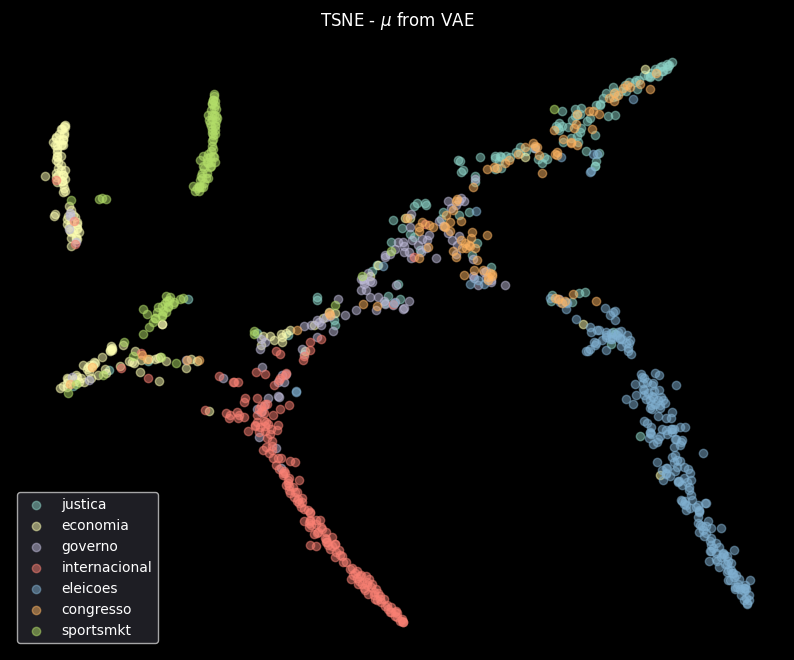

In [21]:
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#26262e' 

plt.figure(figsize=(10, 8))
plt.title(r'TSNE - $\mu$ from VAE')
for i, classe in enumerate(label_encoder):
    plt.scatter(all_codings_tsne[:, 0][all_labels_np == i], all_codings_tsne[:, 1][all_labels_np == i], label=classe.split('-')[1], alpha=0.5)
plt.legend()
plt.axis('off')
plt.show()

In [24]:
# Salvar os parâmetros do modelo
torch.save(model.state_dict(), '../models/vae_model_state_dict.pth')

In [ ]:
# Recrie a instância do modelo (use os mesmos hiperparâmetros)
model_loaded = VAE(
    hidden_dim=hidden_dim,
    encoding_size=encoding_size,
    output_dim_classifier=len(classes),
    dropout=0.5,
    batch_norm_1d=True
)

# Carregue os parâmetros salvos
model_loaded.load_state_dict(torch.load('../models/vae_model_state_dict.pth'))

# Mova o modelo para o dispositivo adequado (CPU ou GPU)
model_loaded.to(device)

C:\Users\gabri\AppData\Local\Temp\ipykernel_56440\3810499224.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_loaded.load_state_dict(torch.load('../models/vae_mode

VAE(
  (encoder): Encoder(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(105879, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)
              